## Loading Datasets

In [68]:
import pandas as pd 
import numpy as np
import re
import gender_guesser.detector as gender

In [69]:
real_users = pd.read_csv('datasets/realusers.csv')
fake_users = pd.read_csv('datasets/fakeusers.csv')

In [70]:
print(real_users.shape)
print(fake_users.shape)

(1481, 41)
(1337, 41)


## Data Preprocessing 
#### Concatenate both datasets

In [71]:
# Concatenate(Join) both datasets into a single dataset
X = pd.concat([real_users, fake_users])
X

,Unnamed: 0,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,...,verified,description,updated,dataset,age_in_days,ratio statuses_count/age,ratio Favorites/age,ratio Friends/Followers,length_of_bio,reputation
0,0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,2007-04-06 10:58:22+00:00,...,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13,5822,3.499,0.025,0.436,151,0.696372
1,1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,2007-04-30 15:08:42+00:00,...,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13,5797,0.540,0.002,0.753,104,0.570462
2,2,5682702,tacone,tacone_,4024,264,87,323,16,2007-05-01 11:53:40+00:00,...,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13,5797,0.694,0.056,0.330,22,0.752137
3,3,6067292,alesaura,alesstar,40586,640,622,1118,32,2007-05-15 16:55:16+00:00,...,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13,5782,7.019,0.193,0.972,36,0.507132
4,4,6015122,Angelo,PerDiletto,2016,62,64,13,0,2007-05-13 19:52:00+00:00,...,NaN,Je me souviens,2015-02-14 10:54:49,E13,5784,0.349,0.002,1.032,14,0.492063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1332,1391497074,Verda Marks,VerdaMarks1,1,0,17,0,0,2013-04-30 08:23:57+00:00,...,NaN,I have been in business onlin and offline for ...,2015-02-14 10:40:01,INT,3606,0.000,0.000,inf,158,0.000000
1333,1333,1391544607,Danial Campbell,DanialCampbell2,0,1,17,0,0,2013-04-30 08:34:49+00:00,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.000,0.000,17.000,3,0.055556
1334,1334,1391622127,Maudie Meyer,MaudieMeyer1,2,0,15,0,0,2013-04-30 09:21:12+00:00,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.001,0.000,inf,3,0.000000
1335,1335,1391832212,Harriett Harvey,HarriettHarvey9,2,0,16,0,0,2013-04-30 11:25:11+00:00,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.001,0.000,inf,3,0.000000


In [72]:
X.columns

Index(['Unnamed: 0', 'id', 'name', 'screen_name', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count',
       'created_at', 'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'age_in_days',
       'ratio statuses_count/age', 'ratio Favorites/age',
       'ratio Friends/Followers', 'length_of_bio', 'reputation'],
      dtype='object')

In [73]:
print('Missing sum values:')
columns_to_check = ['Unnamed: 0', 'id', 'name', 'screen_name', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count',
       'created_at', 'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'age_in_days',
       'ratio statuses_count/age', 'ratio Favorites/age',
       'ratio Friends/Followers', 'length_of_bio', 'reputation']

columns_to_remove = ['Unnamed: 0']

for column in columns_to_check:
    try:
        missing_count = X[column].isnull().sum()
        print(f"{column}: {missing_count}")
        
        # Check if missing count is greater than 2000
        if missing_count > 2000:
            columns_to_remove.append(column)
            print(f"Removing {column} due to more than 2000 missing values.")
    except KeyError:
        # Column having '/' might be causing the issue
        print(f"{column}: Column not found in the DataFrame.")

Missing sum values:
Unnamed: 0: 0
id: 0
name: 0
screen_name: 0
statuses_count: 0
followers_count: 0
friends_count: 0
favourites_count: 0
listed_count: 0
created_at: 0
url: 2355
Removing url due to more than 2000 missing values.
lang: 0
time_zone: 1749
location: 547
default_profile: 1090
default_profile_image: 2810
Removing default_profile_image due to more than 2000 missing values.
geo_enabled: 2097
Removing geo_enabled due to more than 2000 missing values.
profile_image_url: 0
profile_banner_url: 1831
profile_use_background_image: 58
profile_background_image_url_https: 0
profile_text_color: 0
profile_image_url_https: 0
profile_sidebar_border_color: 0
profile_background_tile: 2329
Removing profile_background_tile due to more than 2000 missing values.
profile_sidebar_fill_color: 0
profile_background_image_url: 0
profile_background_color: 0
profile_link_color: 0
utc_offset: 1749
protected: 2818
Removing protected due to more than 2000 missing values.
verified: 2818
Removing verified due 

In [74]:
# Remove columns with more than 2000 null values
X = X.drop(columns=columns_to_remove, axis=1)

# Display the DataFrame after removing columns
print("\nDataFrame after removing columns with more than 2000 null values:")
X


DataFrame after removing columns with more than 2000 null values:


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,lang,...,utc_offset,description,updated,dataset,age_in_days,ratio statuses_count/age,ratio Favorites/age,ratio Friends/Followers,length_of_bio,reputation
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,2007-04-06 10:58:22+00:00,it,...,3600.0,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13,5822,3.499,0.025,0.436,151,0.696372
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,2007-04-30 15:08:42+00:00,en,...,3600.0,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13,5797,0.540,0.002,0.753,104,0.570462
2,5682702,tacone,tacone_,4024,264,87,323,16,2007-05-01 11:53:40+00:00,en,...,3600.0,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13,5797,0.694,0.056,0.330,22,0.752137
3,6067292,alesaura,alesstar,40586,640,622,1118,32,2007-05-15 16:55:16+00:00,en,...,3600.0,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13,5782,7.019,0.193,0.972,36,0.507132
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,2007-05-13 19:52:00+00:00,it,...,3600.0,Je me souviens,2015-02-14 10:54:49,E13,5784,0.349,0.002,1.032,14,0.492063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1391497074,Verda Marks,VerdaMarks1,1,0,17,0,0,2013-04-30 08:23:57+00:00,en,...,NaN,I have been in business onlin and offline for ...,2015-02-14 10:40:01,INT,3606,0.000,0.000,inf,158,0.000000
1333,1391544607,Danial Campbell,DanialCampbell2,0,1,17,0,0,2013-04-30 08:34:49+00:00,en,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.000,0.000,17.000,3,0.055556
1334,1391622127,Maudie Meyer,MaudieMeyer1,2,0,15,0,0,2013-04-30 09:21:12+00:00,en,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.001,0.000,inf,3,0.000000
1335,1391832212,Harriett Harvey,HarriettHarvey9,2,0,16,0,0,2013-04-30 11:25:11+00:00,en,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.001,0.000,inf,3,0.000000


In [75]:
# Assigning False '0' to fake_users list and true '1' to real_users list
y = len(fake_users)*[0]+len(real_users)*[1]

#### Gender Detection Feature Extraction from First Name

In [76]:
# Create a detector instance
sex_predictor = gender.Detector(case_sensitive=False)

# Extract the first name and predict their genders
X['First Name'] = X['name'].str.split(' ').str.get(0)

# To handle names that have unrecognized characters
def clean_name(name):
    cleaned_name = re.sub(r'[^\x00-\x7F]+', '', name)
    return cleaned_name

# Clean the 'First Name' values
X['First Name'] = X['First Name'].apply(clean_name)

X['Predicted Sex'] = X['First Name'].apply(sex_predictor.get_gender)

# Mapping of Gender
sex_dict = {'female': -2, 'mostly_female': -1, 'unknown': 0, 'mostly_male': 1, 'male': 2}

# Handle 'unknown' values
X['Predicted Sex'] = X['Predicted Sex'].apply(lambda x: 'unknown' if x == 'andy' else x)

# Map the predicted genders to codes
X['Sex Code'] = X['Predicted Sex'].map(sex_dict).astype(int)

In [77]:
X.sample(5)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,lang,...,dataset,age_in_days,ratio statuses_count/age,ratio Favorites/age,ratio Friends/Followers,length_of_bio,reputation,First Name,Predicted Sex,Sex Code
1311,1130960574,mary_aryelle,mary_aryelle,511,82,228,91,2,2013-01-29 12:54:25+00:00,it,...,E13,3697,0.138,0.025,2.780,3,0.264516,mary_aryelle,unknown,0
922,617916495,Andres Fitzgerald,andresrizw,24,18,267,0,0,2012-06-25 06:20:56+00:00,en,...,INT,3915,0.006,0.000,14.833,10,0.063158,Andres,male,2
1453,425241854,Luca Pedrotta,LucaPedrotta,114,17,36,7,0,2011-11-30 19:07:49+00:00,it,...,E13,4122,0.028,0.002,2.118,6,0.320755,Luca,male,2
318,135248338,Simonluca Teodoro,simonbonzo85,441,36,166,0,0,2010-04-20 19:22:33+00:00,it,...,E13,4711,0.094,0.000,4.611,32,0.178218,Simonluca,unknown,0
393,616308387,Margarete Wynn,wynnuv,58,20,607,1,0,2012-06-23 15:56:56+00:00,en,...,INT,3916,0.015,0.000,30.350,136,0.031898,Margarete,female,-2


### Assigning numbering representation for each language

In [78]:
# Create a mapping of unique 'lang' values to codes
lang_list = list(enumerate(np.unique(X['lang'])))
lang_dict = {name: i for i, name in lang_list}

lang_dict

{'de': 0, 'en': 1, 'es': 2, 'fr': 3, 'gl': 4, 'it': 5, 'nl': 6, 'tr': 7}

In [79]:
# Map 'lang' values to 'lang_code' and convert to integers
X['lang_code'] = X['lang'].map(lambda lang: lang_dict[lang]).astype(int)

# Feature Extraction from columns
feature_columns_to_use = ['Sex Code','statuses_count','followers_count','friends_count','favourites_count','listed_count','lang_code']

# Create a new DataFrame with selected feature columns
X = X[feature_columns_to_use]

In [80]:
x = X 
x

,Sex Code,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang_code
0,2,20370,5470,2385,145,52,5
1,-2,3131,506,381,9,40,1
2,0,4024,264,87,323,16,1
3,0,40586,640,622,1118,32,1
4,2,2016,62,64,13,0,5
...,...,...,...,...,...,...,...
1332,-2,1,0,17,0,0,1
1333,2,0,1,17,0,0,1
1334,-2,2,0,15,0,0,1
1335,-2,2,0,16,0,0,1


## Model Training

In [116]:
import joblib
import matplotlib.pyplot as plt
%matplotlib inline 


In [117]:
from sklearn import impute
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, learning_curve
from xgboost import XGBClassifier
from sklearn.svm import SVC

#### Plot Learning Curve 

In [118]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a learning curve plot for a machine learning model.

    Parameters:
    - estimator: The machine learning model to evaluate.
    - title: The title of the plot.
    - X: The input features.
    - y: The target variable.
    - ylim: Tuple, optional, the y-axis limits.
    - cv: Cross-validation strategy. None by default.
    - n_jobs: Number of jobs to run in parallel for cross-validation.
    - train_sizes: Array of training set sizes.

    Returns:
    - Matplotlib plot object.
    """

    plt.figure()
    plt.title(title)

    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Generate learning curves using the learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    # Calculate mean and standard deviation of test scores
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Random Forest Classifier

In [119]:
def train(X_train,y_train,X_test, y_test):
    """ Trains and predicts dataset with a Random Forest classifier """
    
    filename = 'model.ckpt'
    clf=RandomForestClassifier(n_estimators=40,oob_score=True)
    clf.fit(X_train,y_train)
    joblib.dump(clf, filename)
    print("The best classifier is: ",clf)

    # Estimate score
    scores = model_selection.cross_val_score(clf, X_train,y_train, cv=5)
    print (scores)
    print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
    title = 'Learning Curves (Random Forest)'
    plot_learning_curve(clf, title, X_train, y_train, cv=5)
    plt.show()

    # Predict 
    y_pred = clf.predict(X_test)
    return y_test, y_pred

### Random Forest Classifier (Custom Hyperparameters)

In [120]:
def train(X_train, y_train, X_test, y_test):
    filename = 'model.ckpt'
    param_grid = {
        'n_estimators': [20, 40, 60, 80, 100],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf_clf = RandomForestClassifier(oob_score=True)
    scorer = make_scorer(accuracy_score)
    grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Save the best model to a file
    best_rf_model = grid_search.best_estimator_
    joblib.dump(best_rf_model, filename)
        
    print("Training Datasets using Random Forest Classifier")
    print("Best Hyperparameters:", grid_search.best_params_)
    y_pred = best_rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the Best Model:", accuracy)
    print("Out-of-Bag Score:", best_rf_model.oob_score_)
    
    title = 'Learning Curves (Random Forest)'
    plot_learning_curve(best_rf_model, title, X_train, y_train, cv=5)
    plt.show()

    return y_test, y_pred

### Support Vector Machine (SVM Classifier-Custom Hyperparameters)

In [121]:
def train(X_train, y_train, X_test, y_test):
    filename = 'model.ckpt'
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['rbf']
    }

    svm_clf = SVC()
    scorer = make_scorer(accuracy_score)
    grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_svm_model = grid_search.best_estimator_
    joblib.dump(best_svm_model, filename)

    print("Training Datasets using SVC")
    print("Best Hyperparameters:", grid_search.best_params_)
    y_pred = best_svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the Best Model:", accuracy)

    title = 'Learning Curves (SVM)'
    plot_learning_curve(best_svm_model, title, X_train, y_train, cv=5)
    plt.show()
    
    return y_test, y_pred

#### Xtreme Gradient Boosting (XGB-Custom Hyperparameters)

In [123]:
def train(X_train, y_train, X_test, y_test):
    filename = 'model.ckpt'
    param_grid = {
        'n_estimators': [20, 40, 60],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.2, 0.3],
        'subsample': [0.8, 0.9, 1.0],
        'min_child_weight': [1, 3, 5]
    }

    xgb_clf = XGBClassifier()
    scorer = make_scorer(accuracy_score)
    grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_xgb_model = grid_search.best_estimator_
    joblib.dump(best_xgb_model, filename)

    print("Training Datasets using XGBoost Classifier")
    print("Best Hyperparameters:", grid_search.best_params_)
    y_pred = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the Best Model:", accuracy)
    
    title = 'Learning Curves (XGBoost)'
    plot_learning_curve(best_xgb_model, title, X_train, y_train, cv=5)
    plt.show()

    return y_test, y_pred

##### Before splitting datasets and starting to training a model, choose one of the classifier trainer model function and re-run

In [124]:
# Perform train-test datasets  split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=44)

Training Datasets using XGBoost Classifier
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 20, 'subsample': 0.9}
Accuracy of the Best Model: 0.9414893617021277


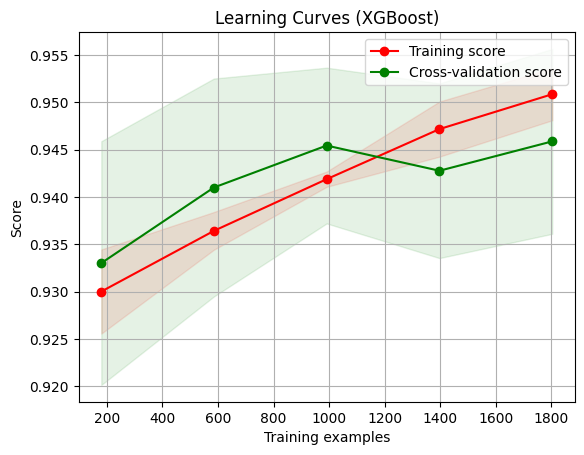

In [125]:
# Start training models
y_test, y_pred = train(X_train, y_train, X_test, y_test)